In [1]:
import os
import sys

# Add ../src to the list of available Python packages
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

from docknet.docknet import Docknet
from docknet.data_generator.swirl_data_generator import SwirlDataGenerator
from docknet.initializer.random_normal_initializer import RandomNormalInitializer
from docknet.optimizer.gradient_descent_optimizer import GradientDescentOptimizer
from docknet.optimizer.adam_optimizer import AdamOptimizer

In [3]:
def scatterplot(axe, X, Y, title, files, rows, index, x0_range, x1_range):
    axe.scatter(X[0, :], X[1, :], c=Y[0:], s=2)
    aspect = (x0_range[1] - x0_range[0]) / (x1_range[1] - x1_range[0])
    axe.set_aspect(aspect)
    axe.set_title(title)
    axe.set_xlim(x0_range)
    axe.set_ylim(x1_range)
    axe.set_xlabel('x0')
    axe.set_ylabel('x1')

In [4]:
train_size = 2000
test_size = 400
x0_range = (-5., 5.)
x1_range = (-5., 5.)

In [5]:
np.random.seed(1)
data_generator = SwirlDataGenerator(x0_range, x1_range)
X_train, Y_train = data_generator.generate_balanced_shuffled_sample(train_size)
X_test, Y_test = data_generator.generate_balanced_shuffled_sample(test_size)

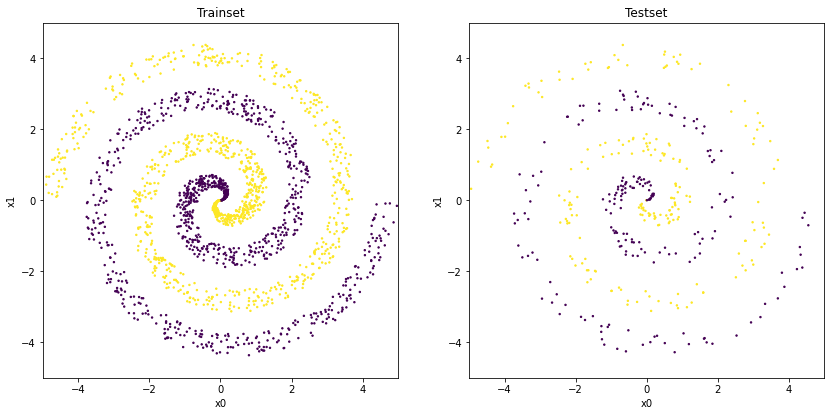

In [6]:
plt.rcParams['figure.figsize'] = [14, 7]
f, axes = plt.subplots(nrows=1, ncols=2)
scatterplot(axes[0], X_train, Y_train, 'Trainset', 1, 2, 1, x0_range, x1_range)
scatterplot(axes[1], X_test, Y_test, 'Testset', 1, 2, 2, x0_range, x1_range)
plt.show()

In [7]:
docknet = Docknet()
docknet.add_input_layer(2)
docknet.add_dense_layer(16, 'relu')
docknet.add_dense_layer(8, 'relu')
docknet.add_dense_layer(1, 'sigmoid')
docknet.initializer = RandomNormalInitializer()
docknet.cost_function = 'cross_entropy'
docknet.optimizer = AdamOptimizer()

In [8]:
np.random.seed(1)
epochs = 600
batch_size = round(train_size / 10.)
epoch_errors, iteration_errors = docknet.train(X_train, Y_train, batch_size=batch_size, max_number_of_epochs=epochs)

Loss after epoch 1: 0.693518938773802
Loss after epoch 2: 0.6798225778681878
Loss after epoch 3: 0.6663572521202044
Loss after epoch 4: 0.66426583031702
Loss after epoch 5: 0.6615880306686063
Loss after epoch 6: 0.6598935790679916
Loss after epoch 7: 0.6589587289676385
Loss after epoch 8: 0.6577502405406145
Loss after epoch 9: 0.6565751228272176
Loss after epoch 10: 0.6554193691959324
Loss after epoch 11: 0.6534824542174913
Loss after epoch 12: 0.6509164494478614
Loss after epoch 13: 0.6461299811437565
Loss after epoch 14: 0.6393294793283684
Loss after epoch 15: 0.6329716949581321
Loss after epoch 16: 0.6262049476463515
Loss after epoch 17: 0.6170718461059499
Loss after epoch 18: 0.6065324803425074
Loss after epoch 19: 0.596049263623518
Loss after epoch 20: 0.5851004652370527
Loss after epoch 21: 0.5753123892178139
Loss after epoch 22: 0.5662151067292279
Loss after epoch 23: 0.5591017355369294
Loss after epoch 24: 0.5529247536305874
Loss after epoch 25: 0.5463583996467876
Loss after ep

Loss after epoch 201: 0.05242691990371187
Loss after epoch 202: 0.051645853187703934
Loss after epoch 203: 0.0510422361258629
Loss after epoch 204: 0.05041333072392152
Loss after epoch 205: 0.04968161498138411
Loss after epoch 206: 0.04886568232106788
Loss after epoch 207: 0.04827574679284201
Loss after epoch 208: 0.04770036870292766
Loss after epoch 209: 0.04705522742114989
Loss after epoch 210: 0.04653037082878691
Loss after epoch 211: 0.04589256636609137
Loss after epoch 212: 0.04529315440952123
Loss after epoch 213: 0.04468605457298566
Loss after epoch 214: 0.04413815025902847
Loss after epoch 215: 0.04357012074422235
Loss after epoch 216: 0.0431340196005974
Loss after epoch 217: 0.04271118159793671
Loss after epoch 218: 0.0423103035668035
Loss after epoch 219: 0.041728020717515905
Loss after epoch 220: 0.041201302849269185
Loss after epoch 221: 0.04068160093266991
Loss after epoch 222: 0.0401146455218446
Loss after epoch 223: 0.03968178807215927
Loss after epoch 224: 0.03926403285

Loss after epoch 394: 0.013297292574756182
Loss after epoch 395: 0.013242761567117216
Loss after epoch 396: 0.013188376658170794
Loss after epoch 397: 0.01313564849619311
Loss after epoch 398: 0.013082645424828947
Loss after epoch 399: 0.01303183353798718
Loss after epoch 400: 0.012978382829719873
Loss after epoch 401: 0.012925668649235859
Loss after epoch 402: 0.012874306840659898
Loss after epoch 403: 0.012823230410969463
Loss after epoch 404: 0.01277214293873435
Loss after epoch 405: 0.01272190526867967
Loss after epoch 406: 0.012671512718134076
Loss after epoch 407: 0.012624290634341501
Loss after epoch 408: 0.012570933291632903
Loss after epoch 409: 0.012524170487955195
Loss after epoch 410: 0.012470828848623114
Loss after epoch 411: 0.012425869432849698
Loss after epoch 412: 0.012374543206784501
Loss after epoch 413: 0.012328651985382516
Loss after epoch 414: 0.012276970440275517
Loss after epoch 415: 0.012233596155581321
Loss after epoch 416: 0.012183260308109758
Loss after epoc

Loss after epoch 586: 0.0069637682501144755
Loss after epoch 587: 0.006943344877056114
Loss after epoch 588: 0.006925094805685438
Loss after epoch 589: 0.006905715861981699
Loss after epoch 590: 0.006885731016605563
Loss after epoch 591: 0.006868133967821454
Loss after epoch 592: 0.0068491919614348
Loss after epoch 593: 0.006829517368369866
Loss after epoch 594: 0.006810477287296401
Loss after epoch 595: 0.00679204178726416
Loss after epoch 596: 0.006773144147337753
Loss after epoch 597: 0.006754205157983865
Loss after epoch 598: 0.006736994513435404
Loss after epoch 599: 0.006717611815050512
Loss after epoch 600: 0.00669984102806766


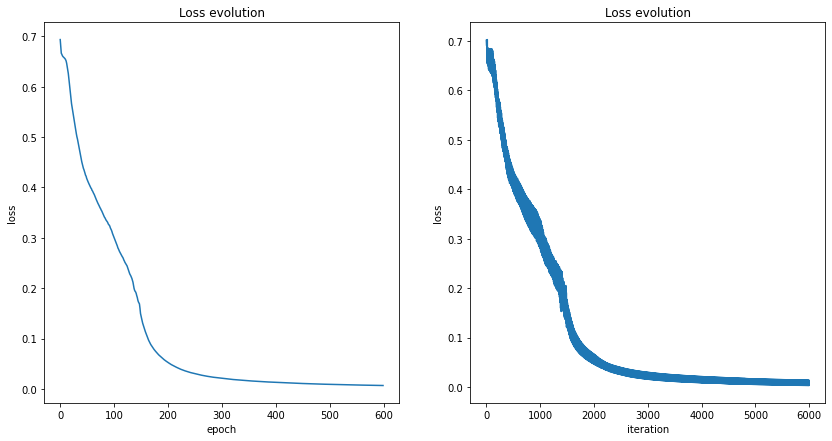

In [9]:
plt.subplot(1, 2, 1)
plt.plot(epoch_errors)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss evolution")
plt.subplot(1, 2, 2)
plt.plot(iteration_errors)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Loss evolution")
plt.show()

In [11]:
Y_predicted = docknet.predict(X_test)
Y_predicted = np.round(Y_predicted)
correct = Y_predicted == Y_test
wrong = Y_predicted != Y_test
X_correct = X_test[:, correct.reshape(test_size)]
Y_correct = Y_test[correct]
X_wrong = X_test[:, wrong.reshape(test_size)]
Y_wrong = Y_test[wrong]

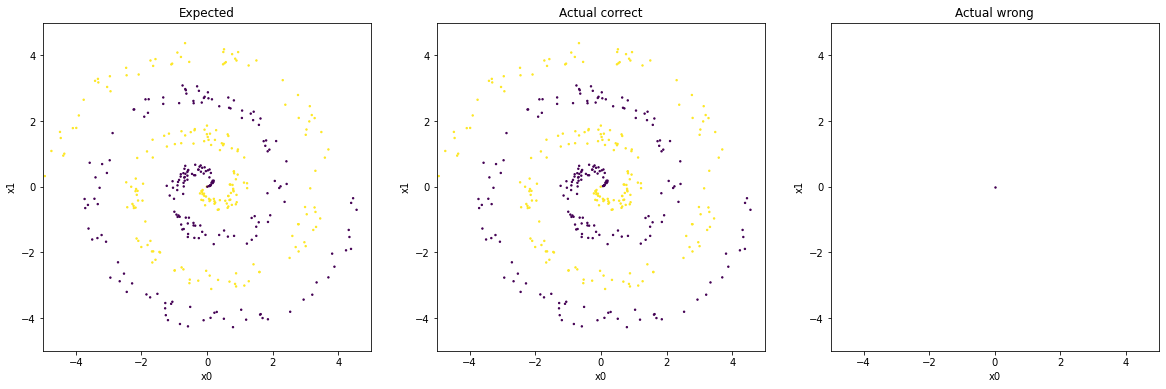

In [12]:
plt.rcParams['figure.figsize'] = [20, 10]
f, axes = plt.subplots(nrows=1, ncols=3)
scatterplot(axes[0], X_test, Y_test, 'Expected', 1, 3, 1, x0_range, x1_range)
scatterplot(axes[1], X_correct, Y_correct, 'Actual correct', 1, 3, 2, x0_range, x1_range)
scatterplot(axes[2], X_wrong, Y_wrong, 'Actual wrong', 1, 3, 3, x0_range, x1_range)
plt.show()

In [13]:
results = metrics.classification_report(Y_test[0], Y_predicted[0])
print(results)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       200
         1.0       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [14]:
conf_matrix = metrics.confusion_matrix(Y_test[0], Y_predicted[0])
print(conf_matrix)

[[199   1]
 [  0 200]]
